# Lab 5: Analyzing Gradient Descent

- [Your name]
- [The name of one of your group members]
- [The name of your other group member]

**Learning Objectives**:

- You will use recurrence relations to prove an algorithm used for training models in machine learning and artificial intelligence. 
- You will describe the *rate of convergence* for this algorithm. 
- You will perform simulations and interpret your results in the context of the theory you have developed. 

**Assessment**: 

Labs are assessed according to [the posted EMRN rubric](https://www.philchodrow.prof/CSCI-0200/pages/lab-assessment.html).

# Collaboration Statement

[*Please describe the contributions of each group member. Please also describe the support you received from Course Assistants, other classmates, and any online resources such as StackExchange or ChatGPT.*]

# Instructions

In Part A, **you should not be typing during the lab period**. You can use your device to look at the lab instructions and for quick checks, but now is not the time for typing. Instead, you should work with your group at your board or on your mini-boards on the specified problems. 

- Remember your group norms from Lab 1. 
- Pass the marker often, *at minimum* twice in every Part. 
- Every group member should take a picture before erasing anything. 

# Background: Gradient Descent

In many contexts in data science, machine learning, artificial intelligence, and various forms of engineering, it is necessary to *minimize a function* -- find it's smallest value. If you've ever wondered why OpenAI needs all that money to make ChatGPT, one of the main answers  is that they need to use supercomputers in order to minimize extremely complicated functions very efficiently. 

**Definition**: A function $f: \mathbb{R} \rightarrow \mathbb{R}$ has a (strict) *minimizer* $x^*\in \mathbb{R}$ if, for all $x \in \mathbb{R}$ such that $x \neq x^*$, it is the case that $f(x^*) < f(x)$. In this case, the *minimum value* of $f$ is $f(x^*)$. The task of *minimizing a function* is the task of finding a minimum $x^*$, if it exists. 

For example, the function $f(x) = \frac{1}{2}x^2$ has a strict minimizer at $x^* = 0$, with minimum value $0$. Here's how that looks on a graph: 

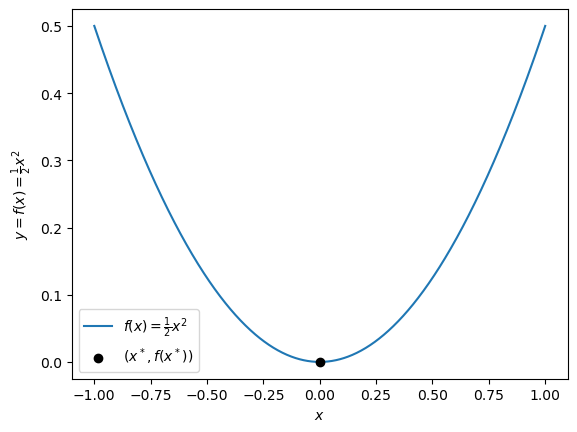

In [1]:
# numerical and visualization packages
import numpy as np 
from matplotlib import pyplot as plt 

# arrays to hold function values
x = np.linspace(-1, 1, 1001)
y = 1/2*x**2 

# plot 
plt.plot(x, y, label = r"$f(x) = \frac{1}{2}x^2$")
plt.scatter([0], [0], color = "black", label = r"($x^*, f(x^*)$)", zorder = 10)
plt.legend()
labs = plt.gca().set(xlabel = r"$x$", ylabel = r"$y = f(x) = \frac{1}{2}x^2$")

In all real-world applications, we have to deal with more complicated functions whose minimizers we don't know exactly. To find minimizers of these functions, we use a family of algorithms based on the idea of *gradient descent*, in which we take a small step in (what is hopefully) the right direction many times over. For example, here's a gradient descent implementation for the function $f(x) = \frac{1}{2}x^2$. We start off with an initial guess that might be very far from the correct minimizer. Then, we take little steps in the right direction, towards the basin of the parabola. As we go, we get closer and closer to the correct minimizer at $x = 0$. It's easiest to start with a picture: 

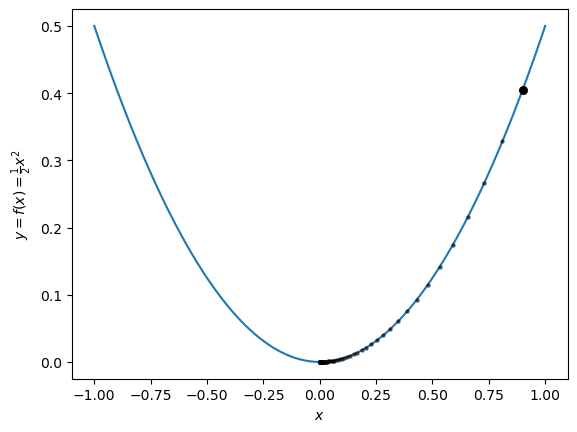

In [2]:
# start the plot
plt.plot(x, y, label = r"$f(x) = x^2$")

# begin with an initial guess about the location of the minimizer
x_guess = 0.9

# plot the guess
plt.scatter([x_guess], [1/2*x_guess**2], color = "black", zorder = 10, s = 30)


T = 100     # number of iterations
t = 0       # initial timestep
alpha = 0.1 # learning rate


# this loop is where gradient descent happens
while t < T: 
    
    # plot current guess
    plt.scatter([x_guess], [1/2*x_guess**2], color = "black", zorder = 10, s = 5, alpha = 0.5)
    
    # gradient descent update
    x_guess = x_guess - alpha*x_guess
    
    # increment the timestep
    t = t+1

labs = plt.gca().set(xlabel = r"$x$", ylabel = r"$y = f(x) = \frac{1}{2}x^2$")

In this lab, we are going to formally state that the gradient descent algorithm works (successfully comes close to the minimizer) and describe how quickly this occurs. We're going to focus our attention on the function $f(x) = \frac{1}{2}x^2$, although we'll consider more general quadratic functions in the last part of the lab. 

## The Gradient Descent Algorithm For $f(x) = \frac{1}{2}x^2$

Formally, the algorithm for gradient descent for $f(x) = \frac{1}{2}x^2$ works as follows. 

**Inputs**: initial guess $x_0$, learning rate $\alpha \in \mathbb{R}^+$, total number of timesteps $T$. 

1. Set $t \gets 0$. 
2. While $t < T$: 
    - Set $x_t \gets x_{t-1} - \alpha x_{t-1}$. 
    - $t \gets t+1$.

This is the algorithm implemented in the Python code block above. 

## Part A: Gradient Descent Converges (Sometimes)

Let $\delta_t = |x_t - 0| = |x_t|$ be the *error* in our current estimate. You can think of $\delta_t$ as the distance between the correct answer (which is $x^* = 0$) and our current guess $x_t$. We'd like to make the error $\delta_t$ close to 0, and we'd like to do so as quickly as possible. 

### Exercise A.1

At the board with your group, write a careful calculation which proves the recursion relation

$$
\delta_t = |1 - \alpha | \delta_{t-1}\;.
$$

for the error $\delta_t$ when using the gradient descent algorithm outlined above. Then, after lab, type your calculation and place it below. 

**Hints**: 

- $|a|$ is the absolute value of $a$.
- For any $a, b \in \mathbb{R}$, $|ab| = |a||b|$. 

[*Type a careful version of your calculation below.*]

### Exercise A.2 

At the board, write a proof by induction on the timestep $t$ that the following formula solves the recurrence relation from A.1:  

$$
\delta_t = |1-\alpha|^{t} \delta_0\;. 
$$

Then, after lab, type your proof and place it below. Please remember to include both a base case and an inductive step. Use Exercise A.1! 

[*Type a careful proof by induction based on your work.*]



The number $\alpha$ is often called the *learning rate*. It's nice for the learning rate to be large, because this often allows us to get good approximations quickly. However, we can't choose this number to be too large...

## Exercise A.3 

There exist numbers $\alpha_*$ and $\alpha^*$ with the property that $\delta_t < \delta_{t-1}$ if and only if $\alpha_* < \alpha < \alpha^*$. Determine the values of $\alpha_*$ and $\alpha^*$ and explain. You'll need to use the recursion relation in A.1. 

[*Your solution here*]


## Exercise A.4

Suppose that we do $1,000$ steps of gradient descent, so that $T = 1,000$. Consider the following three possibilities: 

1. $\delta_T$ becomes very close to 0. 
2. $\delta_T$ stays at its original value $\delta_0$. 
3. $\delta_T$ becomes very large. 

Describe which of these possibilities  will occur in the following scenarios: 

- Scenario I: $\alpha = 0$. 
- Scenario II: $\alpha = 3$. 
- Scenario III: $\alpha = 1/2$. 

[*Your response here*]



## Exercise A.5 

Fill in the blanks and write a proof of the following theorem. 

**Theorem**: If we do many steps of gradient descent for the function $f(x) = \frac{1}{2}x^2$ with learning rate $\alpha$, the error $\delta_t$ will converge (become very close) to 0 if and only if $\_\_\_ < \alpha < \_\_\_$. 

**Hint**: *To prove the theorem, you should just cite your answers to the previous parts. You don't actually have to do very much new mathematics in this exercise; you just have to connect your results together in a full proof.* 

[*Your proof here*.]


## Exercise A.6

Suppose that I start with an initial guess $x_0$. I would like to run my gradient descent algorithm long enough that, in my final timestep $t$, $\delta_T < \epsilon$ for some small number $\epsilon > 0$. $\epsilon$ is often called the *tolerance*. Using your response from Exercise A.2, solve for $T$ in terms of the tolerance $\epsilon$. **Please show your work!** The result should be a formula for the necessary number of timesteps $T$ in terms of $\epsilon$. 


**Hint**: You will need to use logs to solve for $T$. 



[*Your calculation for the required number of steps $T$ to achieve a given tolerance*]

**SOLUTION**:  



## Part B

Below, I've started a computational experiment in which I've run the gradient descent algorithm for two separate values of $\alpha$. On the horizontal axis I've plotted the iteration number, and on the vertical axis I've plotted the error $\delta_t$ on log-scaled axes. 

For the value of $\alpha$ I chose, the error decreases on the log-scaled axes. 

Guided by your results in the previous parts, add two values of $\alpha$ to the `alpha_vals` list such that: 

- In one case, the error *increases*. Bad! 
- In another case, the error is constant and never changes. Whoops! 

All you need to do is add two values to the `alpha_vals` list and then run the code cell. 

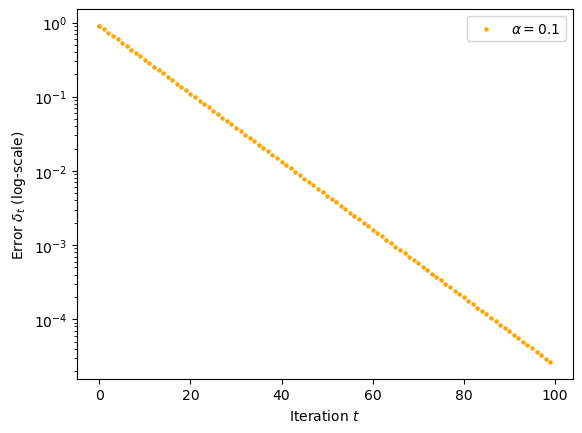

In [3]:
# you only need to edit this list!

# SOLUTION (lots of valid values)
alpha_vals = [.1]

## -------
## no need to touch anything below
## -------

colors = ["orange", "blue", "black", "grey"]
for i in range(len(alpha_vals)): # for each value of alpha
    
    # do a complete algorithm run
    x_guess = 0.9
    alpha = alpha_vals[i]
    color = colors[i]
    
    T = 100
    t = 0

    # plot the results
    plt.scatter([t], [x_guess], zorder = 10, s = 5, color = color, label = r"$\alpha = $" + str(alpha))
    while t < T: 
        plt.scatter([t], [x_guess], zorder = 10, s = 5, color = color)
        x_guess = x_guess - alpha*x_guess
        t = t+1

# label the plot
plt.semilogy()
plt.legend()
labs = plt.gca().set(xlabel = "Iteration $t$", ylabel = r"Error $\delta_t$ (log-scale)")

## Part C (Required for **E**, optional for **M**)

*If you are happy with an **M** on this assignment, you can skip all of Part C and move on to Part D. You should solve this part only if you want an E.*

Consider now the general quadratic function $f(x) = \frac{1}{2} ax^2 + bx + c$ for some $a > 0$ and $b, c \in \mathbb{R}$. 
This function has its minimum at the point $x_* = -\frac{b}{a}$. For this function, the gradient descent algorithm is just a little bit different:  

**Inputs**: initial guess $x_0$, learning rate $\alpha \in \mathbb{R}^+$, total number of timesteps $T$. 

1. Set $t \gets 0$. 
2. While $t < T$: 
    - Set $x_t \gets x_{t-1} - \alpha (ax_{t-1} + b)$. 
    - $t \gets t+1$.

In this section, you'll repeat the exercises in Part A for this more general function. The results will be similar but a little more complicated. 

### Exercise C.1

Define  $\delta_t = |x_t - x_*|$. Prove the recursion relation 

$$
\delta_t = |1 - \alpha a | \delta_{t-1}\;.
$$

*Hint*: the algebra here is messier but it's nothing more than grouping, rearranging fractions, and factoring. 

[*Your proof here*]



### Exercise C.2 

There exist numbers $\alpha_*$ and $\alpha^*$ such that we are guaranteed that $\delta_t \rightarrow 0$ if any only if $\alpha_* < \alpha < \alpha^*$. What are $\alpha_*$ and $\alpha^*$ in terms of $a$, $b$, and $c$? Justify your response. 

[*your response here*]



### Exercise C.3 

Suppose that indeed $\alpha_* < \alpha < \alpha^*$. Suppose that we start with initial guess $x_0$. Suppose that we wish to run our algorithm for a number of timesteps $T$ so that the error $\delta_T$ is guaranteed to be less than $\epsilon$. Solve for $T$ in terms of $\epsilon$, $x_0$, $a$, $b$, and $c$ to find the required number of steps. **Please show your work!**


[*Your calculation here*]



# Part D: Reflection

Write a paragraph in response to the following prompt: 

1. Approximately how long did it take you to complete this lab, **including Friday's in-class lab time**? 
2. Big picture, how would you describe what this lab was about?
3. What are three skills you learned or practiced in this lab?
4. What is a way in which your group supported your learning during this lab?
5. What's something you found interesting, stimulating, or fun about this lab?
6. What's something you found challenging, disappointing, or frustrating about this lab?


[*Your reflection here*]